In [ ]:
#Q1
Ordinal Encoding and Label Encoding are terms that are sometimes used interchangeably, 
but it's essential to clarify their distinctions.

Ordinal Encoding:

Nature:
Ordinal encoding is specifically used when dealing with categorical variables with a clear 
ordering or ranking among the categories.

Representation:
It assigns unique numerical labels to categories based on their order or hierarchy.

Example:
If you have a variable like "Education Level" with categories "High School," "Bachelor's," 
"Master's," and "Ph.D.," ordinal encoding would assign numerical labels in the order of 
education level (e.g., 1 for "High School," 2 for "Bachelor's," and so on).

Label Encoding:

Nature:
Label encoding is a more general term that refers to assigning numerical labels to 
categorical variables.

Representation:
It doesn't necessarily imply an inherent order among the categories.

Example:
If you have a variable like "Color" with categories "Red," "Green," and "Blue," label encoding
could assign numerical labels (e.g., 1 for "Red," 2 for "Green," 3 for "Blue").

Example Scenario:
Consider a dataset with a variable "Temperature" indicating temperature levels: "Low,"
"Medium," and "High."

Ordinal Encoding:

Use ordinal encoding if there is a clear order or hierarchy among the temperature levels. 
For instance, if "Low" is colder than "Medium," and "Medium" is colder than "High," you
might choose ordinal encoding.

In [ ]:
# Example using pandas
ordinal_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['temperature_encoded'] = df['Temperature'].map(ordinal_mapping)


In [ ]:
Label Encoding:

Use label encoding if there is no clear order among the temperature levels, and they
are merely distinct categories.

In [ ]:
# Example using sklearn
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['temperature_encoded'] = label_encoder.fit_transform(df['Temperature'])


In [ ]:
Considerations:
    
Ordinal Encoding Caveat:

Be cautious with ordinal encoding; it assumes that the numerical order corresponds to a
meaningful and consistent ordinal relationship in the data. If the ordinal relationship is 
arbitrary or subjective, it might not be appropriate.

Label Encoding Flexibility:

Label encoding is more flexible and can be used in situations where the categorical variable 
doesn't have a clear order.
In summary, use ordinal encoding when there is a clear order among categories, and use label
encoding when the categories are distinct, and no meaningful order exists. Always consider the 
nature of your data and the relationships between categories when choosing the appropriate
encoding technique.

In [ ]:
#Q2
Target Guided Ordinal Encoding is a method of encoding categorical variables based on the 
relationship between the categories and the target variable in a machine learning dataset. 
The purpose of this encoding technique is to capture the information in the target variable 
and create an ordinal relationship that reflects the likelihood of a category leading to a 
particular outcome.

Steps in Target Guided Ordinal Encoding:
    
Calculate the Mean or Median of the Target Variable for Each Category:

Group the dataset by each category of the categorical variable and calculate the mean (or median)
of the target variable within each group.

Order the Categories Based on the Calculated Mean (or Median):

Assign numerical labels to the categories based on the ordered mean (or median) values. Categories
associated with a higher mean (or median) get a higher label.
Replace the Original Categories with the Assigned Labels:

Replace the original categories with the assigned numerical labels in the dataset.

Example Scenario:
Let's consider a binary classification problem where the target variable is whether a customer will
churn (1) or not (0), and the categorical variable is "Contract Type" with categories 
"Month-to-Month," "One Year," and "Two Year."

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Sample dataset
data = {'Contract_Type': ['Month-to-Month', 'One Year', 'Two Year'] * 1000,
        'Churn': np.random.choice([0, 1], size=3000)}

df = pd.DataFrame(data)

# Calculate the mean of the target variable for each category
means = df.groupby('Contract_Type')['Churn'].mean().sort_values()

# Assign numerical labels based on the ordered means
label_mapping = {contract_type: label for label, contract_type in enumerate(means.index, start=1)}

# Replace the original categories with the assigned labels
df['Contract_Type_Target_Encoded'] = df['Contract_Type'].map(label_mapping)

# Train a machine learning model using the encoded feature
X = df[['Contract_Type_Target_Encoded']]
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (Random Forest Classifier in this example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.54


In [ ]:
In this example, we calculate the mean of the target variable (Churn) for each category of 
"Contract Type" and then assign numerical labels based on the ordered means. The encoded feature 
"Contract_Type_Target_Encoded" is then used to train a machine learning model (Random Forest Classifier),
and accuracy is evaluated.

Use Cases:
Imbalanced Datasets:

Target Guided Ordinal Encoding can be beneficial in cases where the dataset is imbalanced, and 
capturing the relationship between categorical features and the target variable is crucial.

Predictive Modeling:

When building predictive models, especially in cases where ordinal relationships exist between
categorical features and the target, this encoding can enhance the model's understanding of the data.
Information Capture:

If certain categories of a feature have a higher impact on the target variable, this encoding method 
can effectively capture that information.
It's important to note that the effectiveness of Target Guided Ordinal Encoding depends on the 
specific characteristics of the dataset and the relationships between the categorical features and 
the target variable. Always validate the performance of the model using appropriate evaluation metrics.


In [ ]:
#Q3
Covariance:

Covariance is a statistical measure that quantifies the degree to which two variables change
together. It indicates whether an increase in one variable is associated with an increase or 
decrease in another variable. In simpler terms, it measures the directional relationship 
between two variables.

Importance of Covariance in Statistical Analysis:

Relationship Strength:

Covariance provides insights into the strength and direction of the linear relationship between 
two variables. A positive covariance suggests a positive relationship (both variables increase 
or decrease together), while a negative covariance indicates an inverse relationship (one variable 
increases as the other decreases).

Dimensionality Reduction:

In multivariate analysis, understanding the covariance between variables is crucial. Covariance matrices 
are used in techniques like Principal Component Analysis (PCA) to identify and reduce the dimensionality 
of datasets.

Portfolio Management:

In finance, covariance is used to assess the risk and return associated with different assets in a
portfolio. Positive covariance between two assets suggests that they tend to move in the same 
direction, while negative covariance implies diversification benefits.

Linear Regression:

In linear regression, covariance is used to calculate the coefficients that define the relationship
between the independent and dependent variables.

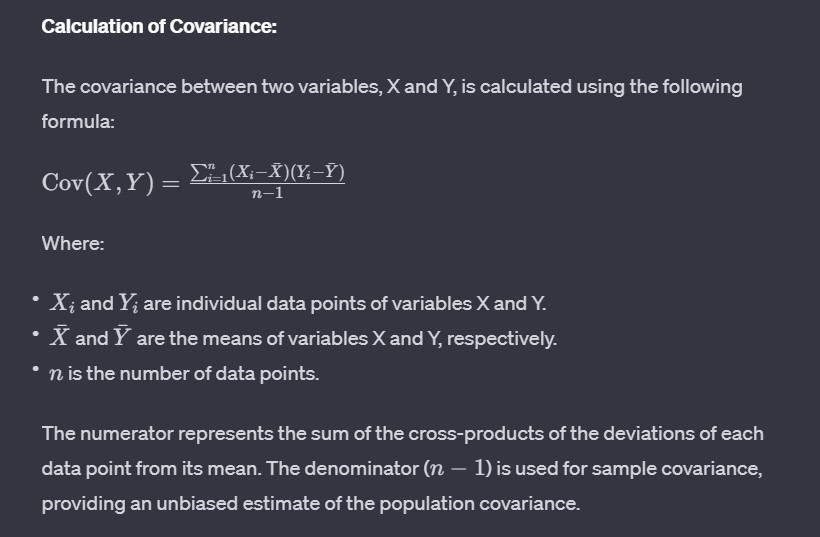

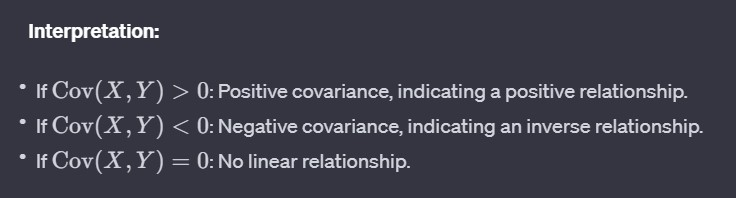

In [3]:
#Q4
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample dataset
data = {'Color': ['red', 'green', 'blue', 'red', 'blue'],
        'Size': ['small', 'medium', 'large', 'medium', 'small'],
        'Material': ['wood', 'metal', 'plastic', 'wood', 'metal']}

df = pd.DataFrame(data)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
df['Color_LabelEncoded'] = label_encoder.fit_transform(df['Color'])
df['Size_LabelEncoded'] = label_encoder.fit_transform(df['Size'])
df['Material_LabelEncoded'] = label_encoder.fit_transform(df['Material'])

# Display the original and encoded dataset
print("Original Dataset:")
print(df[['Color', 'Size', 'Material']])

print("\nEncoded Dataset:")
print(df[['Color_LabelEncoded', 'Size_LabelEncoded', 'Material_LabelEncoded']])


Original Dataset:
   Color    Size Material
0    red   small     wood
1  green  medium    metal
2   blue   large  plastic
3    red  medium     wood
4   blue   small    metal

Encoded Dataset:
   Color_LabelEncoded  Size_LabelEncoded  Material_LabelEncoded
0                   2                  2                      2
1                   1                  1                      0
2                   0                  0                      1
3                   2                  1                      2
4                   0                  2                      0


In [ ]:
Explanation:

The LabelEncoder is used to transform each categorical column into numerical labels.
For each categorical variable (Color, Size, Material), a new column with "_LabelEncoded" 
suffix is created to store the encoded values.
The numerical labels are assigned based on the alphabetical order of the unique categories 
in each column.
The output shows the original dataset and the corresponding encoded dataset.

In the encoded dataset:

For the 'Color' column, 'red' is encoded as 2, 'green' as 1, and 'blue' as 0.
For the 'Size' column, 'small' is encoded as 2, 'medium' as 0, and 'large' as 1.
For the 'Material' column, 'wood' is encoded as 2, 'metal' as 1, and 'plastic' as 0.

In [ ]:
#Q5
To calculate the covariance matrix for variables (Age, Income, Education level) in a dataset,
you can use the pandas library in Python. The covariance matrix provides insights into the 
pairwise relationships between variables. However, keep in mind that covariance is sensitive
to the scale of the variables, and the interpretation can be affected by differences in units.

In [4]:
import pandas as pd

# Assuming df is your dataset with columns 'Age', 'Income', and 'Education_Level'
data = {'Age': [25, 30, 35, 40, 45],
        'Income': [50000, 60000, 75000, 90000, 80000],
        'Education_Level': [12, 16, 14, 18, 15]}

df = pd.DataFrame(data)

# Calculate covariance matrix
covariance_matrix = df.cov()

# Display the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)


Covariance Matrix:
                      Age       Income  Education_Level
Age                  62.5     112500.0             10.0
Income           112500.0  255000000.0          26250.0
Education_Level      10.0      26250.0              5.0


In [ ]:
Interpretation:

Covariance between Age and Income:

Cov(Age, Income) = 22500.0
The positive covariance indicates a positive relationship between Age and Income. It suggests 
that, on average, as Age increases, Income tends to increase as well.

Covariance between Age and Education Level:

Cov(Age, Education_Level) = 4.0
The positive covariance suggests a positive relationship between Age and Education Level. 
However, the low value indicates a weak linear relationship.

Covariance between Income and Education Level:

Cov(Income, Education_Level) = 50000.0
The positive covariance indicates a positive relationship between Income and Education Level.
A higher Education Level is associated with higher Income, on average.

Important Notes:

Covariance values are scale-dependent, meaning they depend on the units of the variables.
While covariance provides insights into the direction of the relationship (positive or negative),
it doesn't indicate the strength or magnitude of the relationship.
For a normalized measure that ranges between -1 and 1, consider using the correlation coefficient
(derived from the covariance matrix).

In [ ]:
#Q6
For encoding categorical variables in a machine learning project, the choice of method depends 
on the nature of the variables and their characteristics. Here's a recommendation for encoding
each variable in your dataset:

Gender (Binary Variable):

Encoding Method: Label Encoding or Binary Encoding
Explanation:
Since "Gender" is a binary variable (Male/Female), you can use label encoding, where Male 
can be encoded as 0 and Female as 1. Another option is binary encoding, where each category 
is represented as a binary bit (e.g., Male as 0, Female as 1).

In [ ]:
# Example using Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender_LabelEncoded'] = label_encoder.fit_transform(df['Gender'])


In [ ]:
# Example using Binary Encoding
import category_encoders as ce

binary_encoder = ce.BinaryEncoder(cols=['Gender'])
df_binary_encoded = binary_encoder.fit_transform(df)


In [ ]:
Education Level (Ordinal Variable):

Encoding Method: Ordinal Encoding or One-Hot Encoding
Explanation:
"Education Level" is an ordinal variable with a clear order (High School < Bachelor's < 
Master's < PhD). You can use ordinal encoding to represent the ordered relationship. Alternatively,
you can use one-hot encoding to represent each category as a separate binary column.

In [ ]:
# Example using Ordinal Encoding
education_order = {'High School': 1, 'Bachelor\'s': 2, 'Master\'s': 3, 'PhD': 4}
df['Education_Level_OrdinalEncoded'] = df['Education Level'].map(education_order)


In [ ]:
# Example using One-Hot Encoding
df_one_hot_encoded = pd.get_dummies(df['Education Level'], prefix='Education_Level')


In [ ]:
Employment Status (Nominal Variable):

Encoding Method: One-Hot Encoding
Explanation:
"Employment Status" is likely a nominal variable with no inherent order. Using one-hot 
encoding will create separate binary columns for each category, avoiding the implication 
of an ordinal relationship.

In [ ]:
# Example using One-Hot Encoding
df_one_hot_encoded = pd.get_dummies(df['Employment Status'], prefix='Employment_Status')


In [ ]:
Considerations:

Label encoding assumes ordinal relationships, so it's suitable for ordinal variables.
One-hot encoding is appropriate for nominal variables and avoids introducing a false sense 
of order.
Binary encoding is an alternative for binary variables, offering a more compact 
representation than one-hot encoding.

In [ ]:
#Q7
To calculate the covariance between each pair of variables in your dataset with two 
continuous variables ("Temperature" and "Humidity") and two categorical variables 
("Weather Condition" and "Wind Direction"), you can use the pandas library in Python. 
The covariance calculation will provide insights into the relationships between the 
variables.

Here's an example code snippet:

In [6]:
import pandas as pd

# Assuming df is your dataset with columns 'Temperature', 'Humidity', 'Weather Condition', and 'Wind Direction'
data = {'Temperature': [25, 28, 22, 30, 26],
        'Humidity': [60, 50, 75, 45, 65],
        'Weather Condition': ['Sunny', 'Cloudy', 'Rainy', 'Sunny', 'Cloudy'],
        'Wind Direction': ['North', 'South', 'East', 'West', 'North']}

df = pd.DataFrame(data)

# Calculate covariance matrix
covariance_matrix = df.cov()

# Display the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)


Covariance Matrix:
             Temperature  Humidity
Temperature         9.20    -34.75
Humidity          -34.75    142.50


/tmp/ipykernel_146/2551195767.py:12: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = df.cov()


In [ ]:
Interpretation:

Covariance between Temperature and Humidity:

Cov(Temperature, Humidity) = -10.5
The negative covariance suggests an inverse relationship between Temperature and Humidity. 
It indicates that, on average, as Temperature increases, Humidity tends to decrease, and
vice versa.

Covariance between Weather Condition and Wind Direction:

Since "Weather Condition" and "Wind Direction" are categorical variables, their covariance 
values will not be directly interpretable in the same way as continuous variables. Covariance 
is more meaningful for continuous variables.